# WASP-103

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
name = 'WASP-103'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [4]:
obs = om.Observation.from_files(fnames)

/Users/ch/HST/projects/ombre/src/ombre/visit.py:208: RuntimeWarning: divide by zero encountered in true_divide
  w[self.err / self.sci > 0.1] = 1e10


In [5]:
obs

2MASS-J16371556+0711000 [8 Visits]

In [6]:
obs.fit_transit(fit_t0=True, fit_period=False, fit_inc=False)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

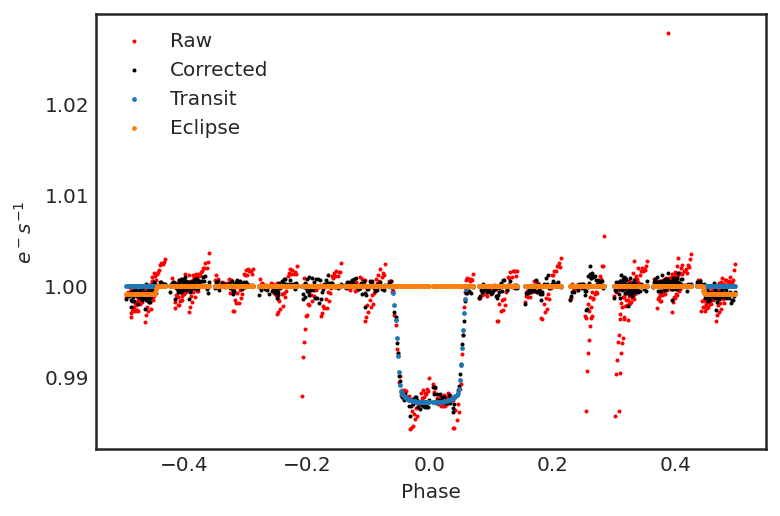

In [7]:
obs.plot()

In [8]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/8 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  12%|█▎        | 1/8 [00:08<00:56,  8.09s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 2/8 [00:11<00:32,  5.45s/it]

Fitting Transit/Eclipse Model:  38%|███▊      | 3/8 [00:15<00:23,  4.72s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 4/8 [00:22<00:22,  5.66s/it]

Fitting Transit/Eclipse Model:  62%|██████▎   | 5/8 [00:31<00:20,  6.78s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 6/8 [00:34<00:10,  5.47s/it]

Fitting Transit/Eclipse Model:  88%|████████▊ | 7/8 [00:38<00:04,  4.98s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [00:47<00:00,  6.21s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [00:47<00:00,  5.89s/it]

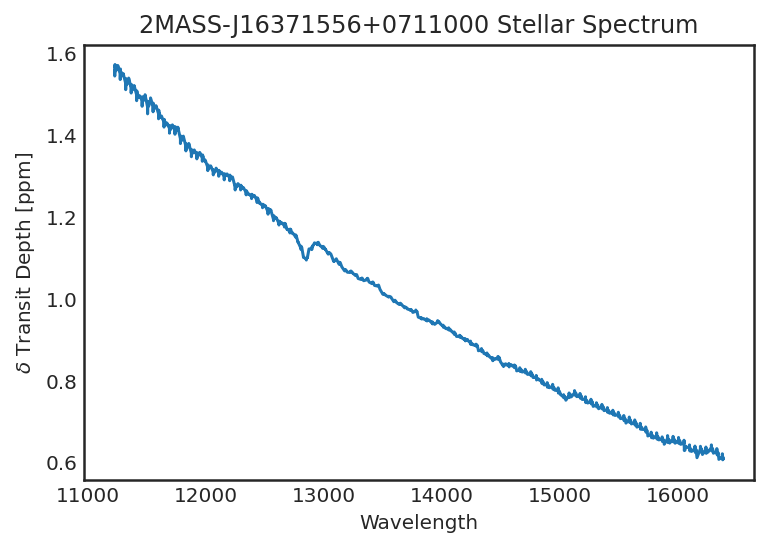

In [9]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

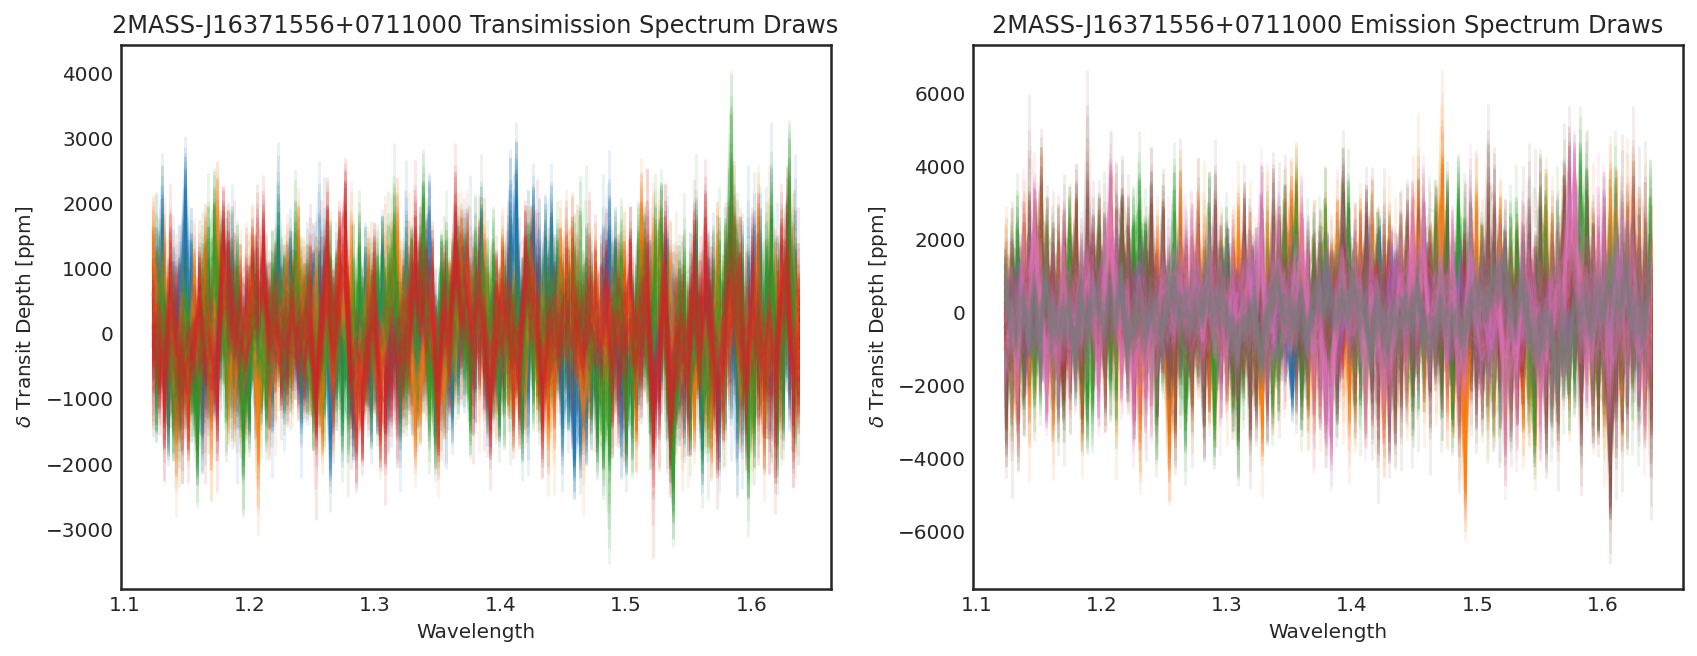

In [10]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

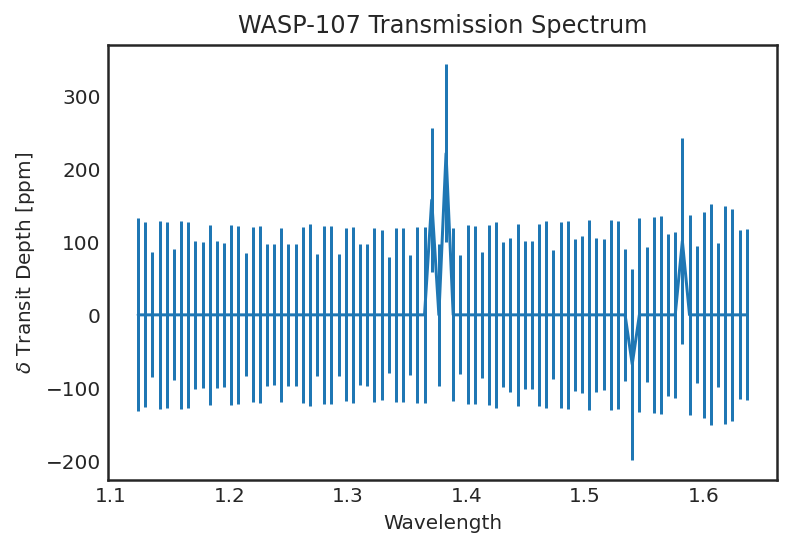

In [11]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [12]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

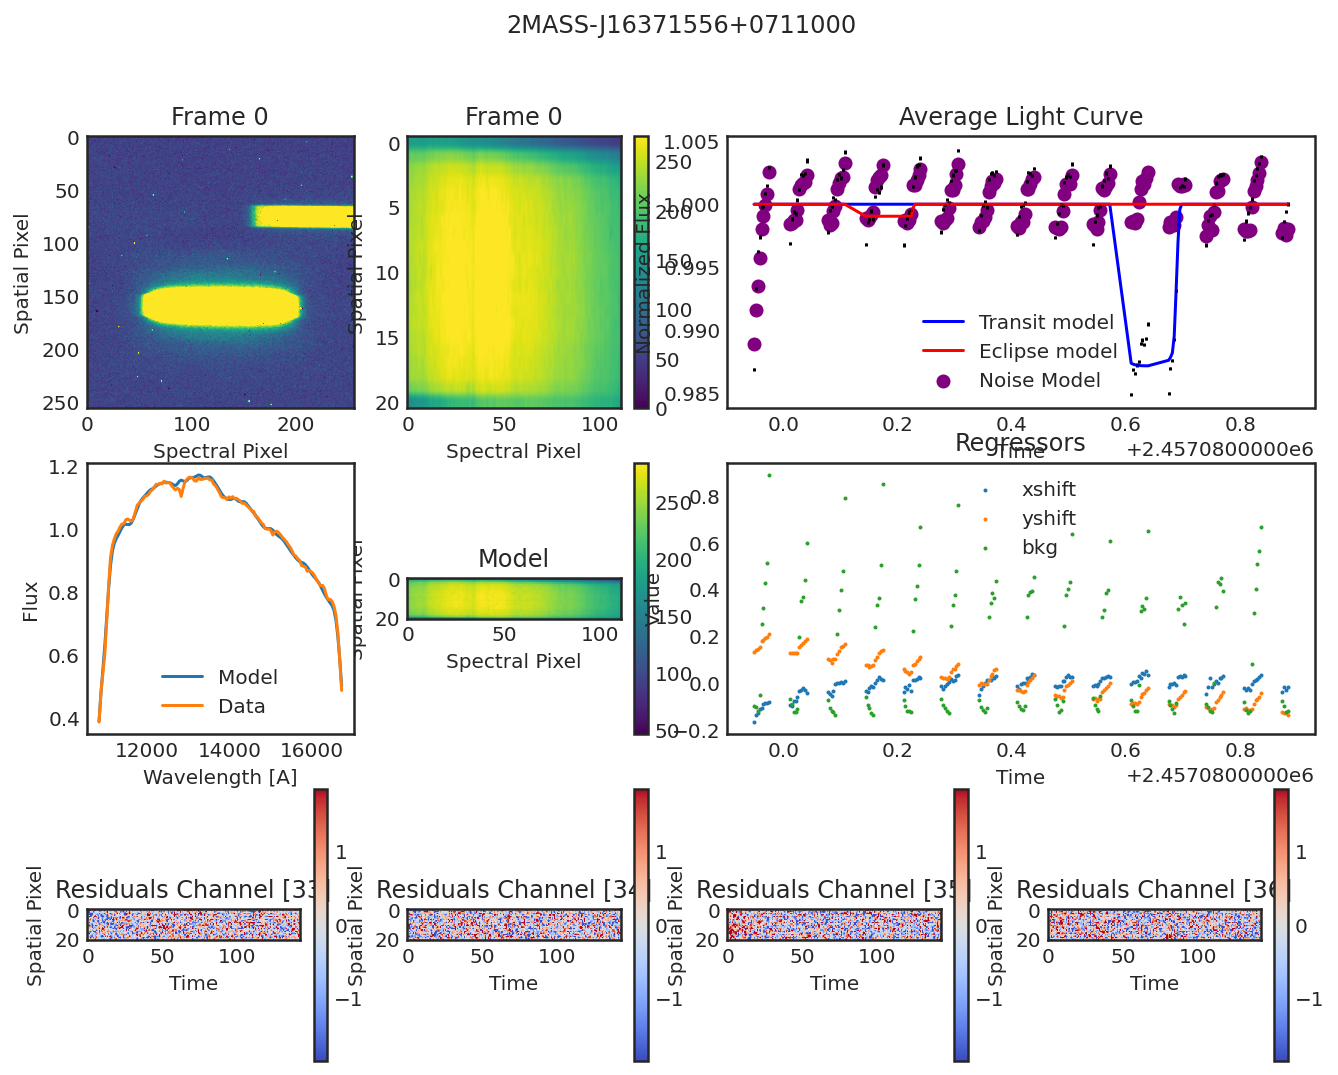

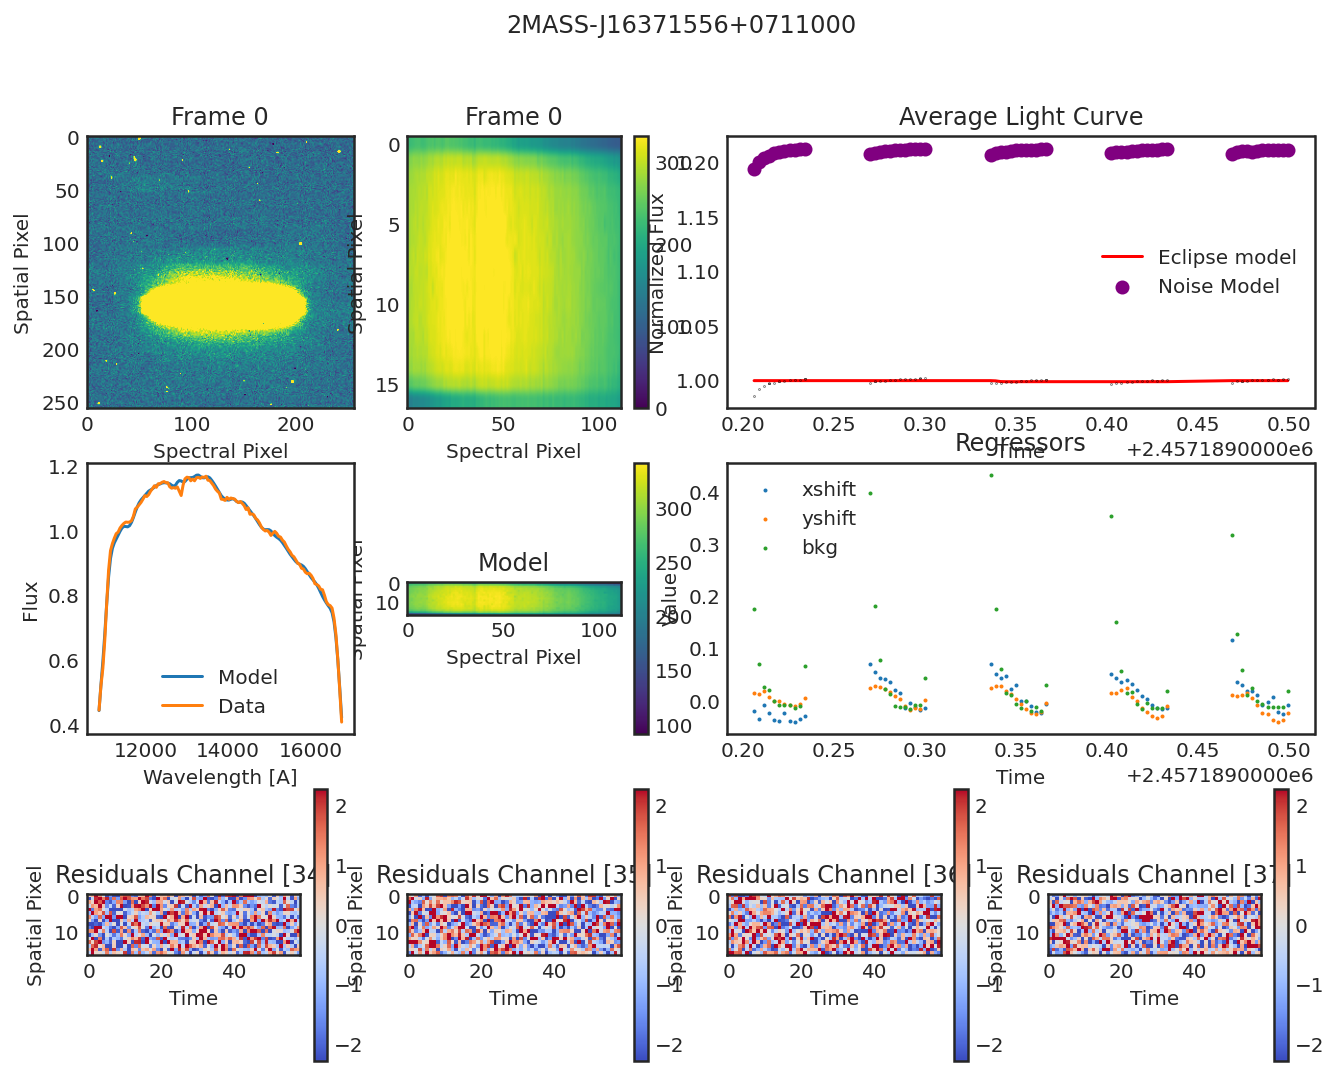

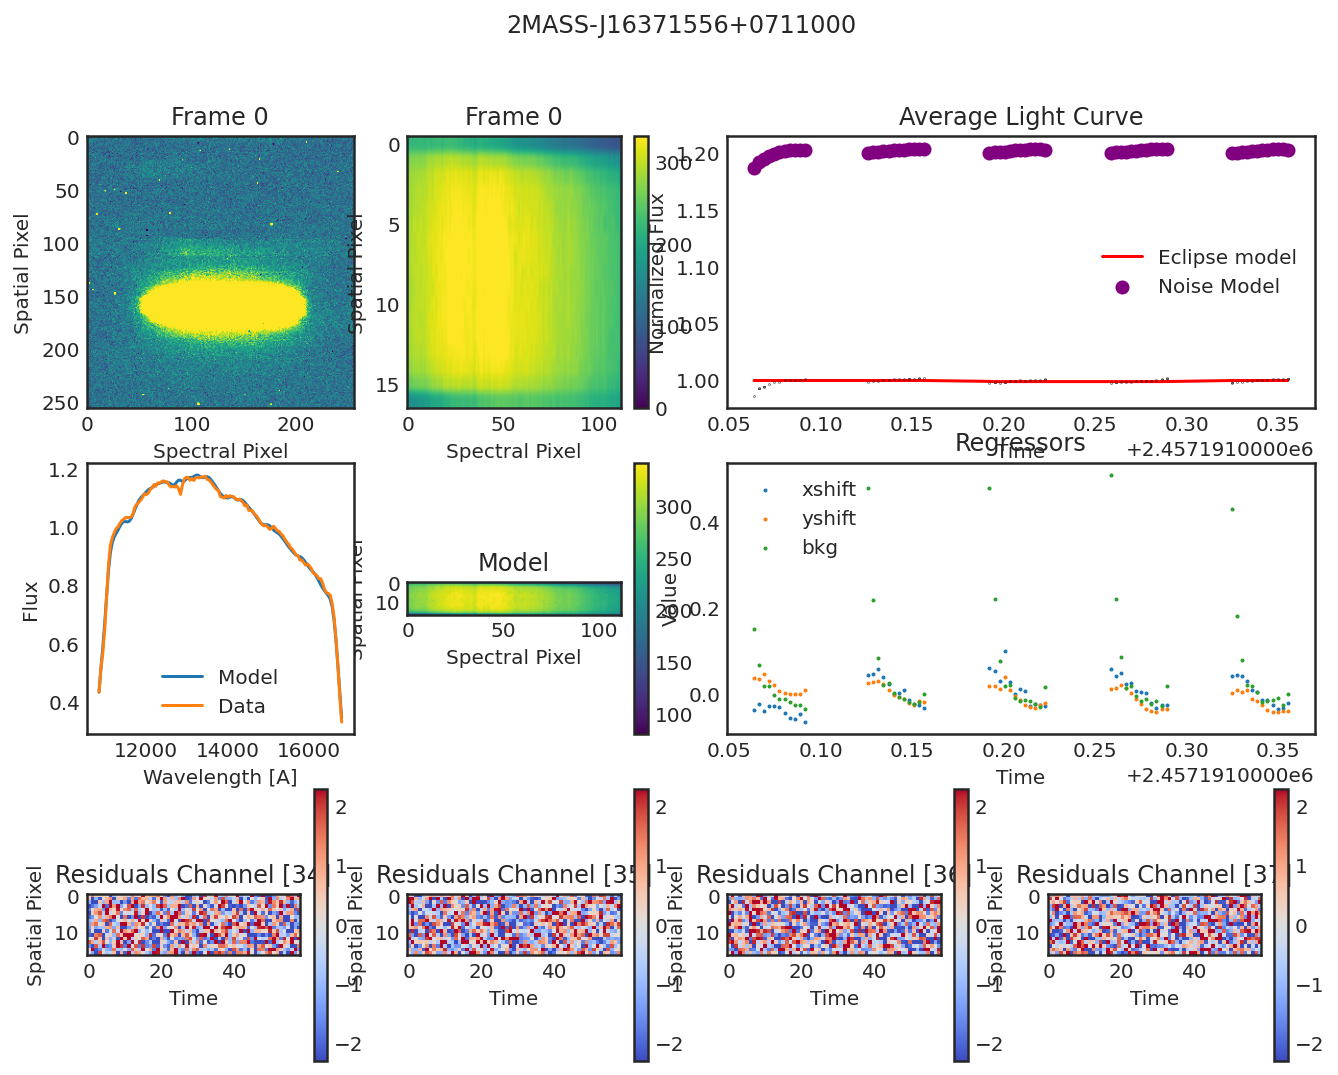

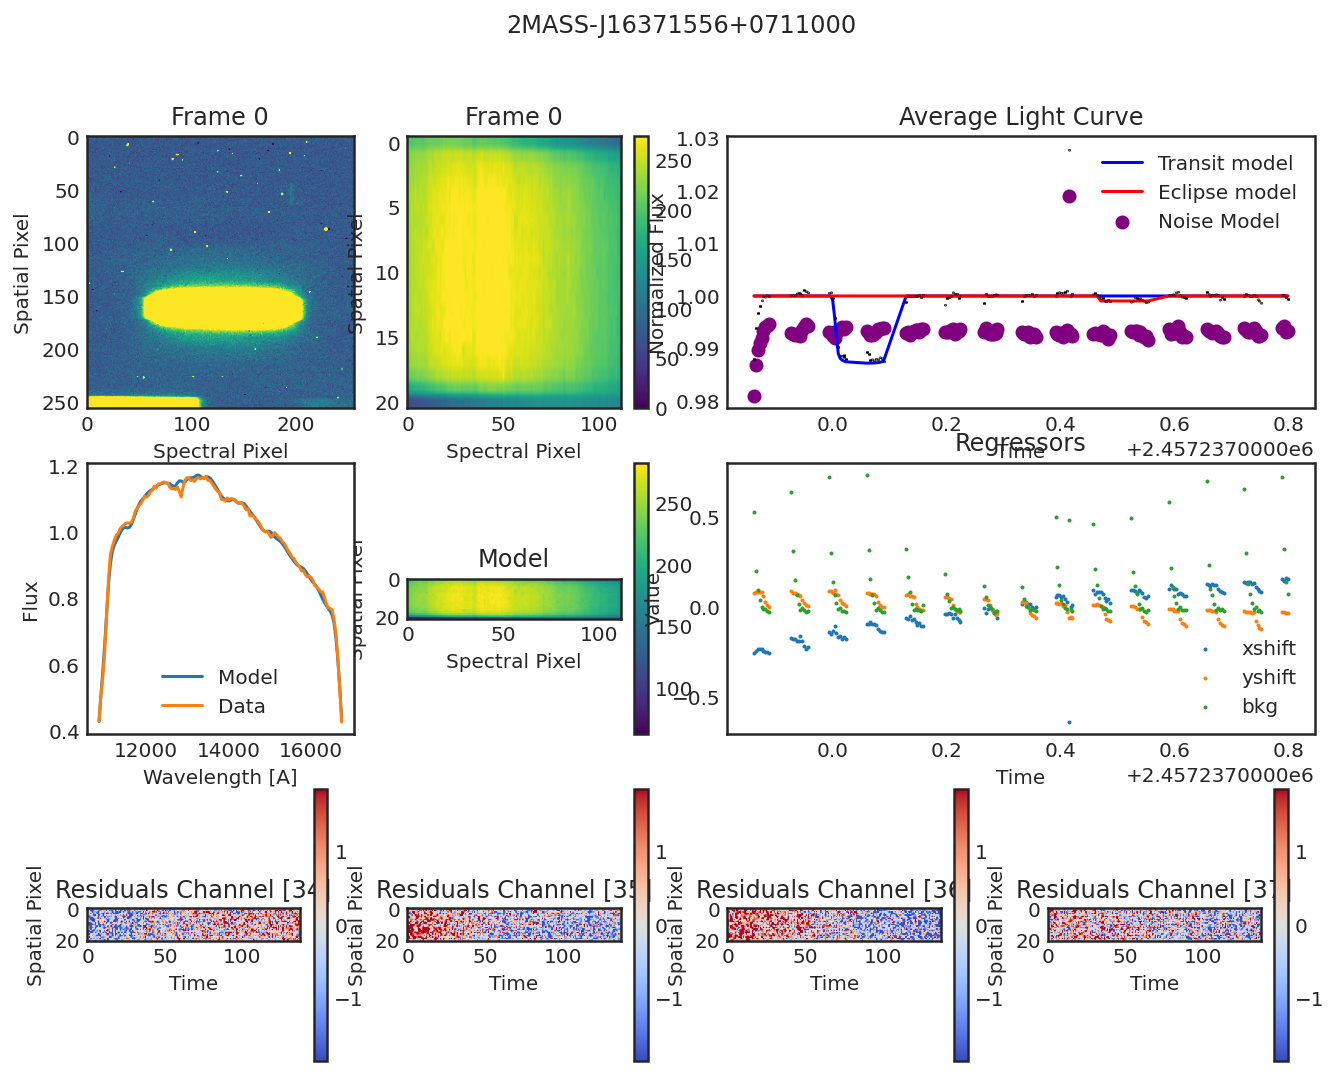

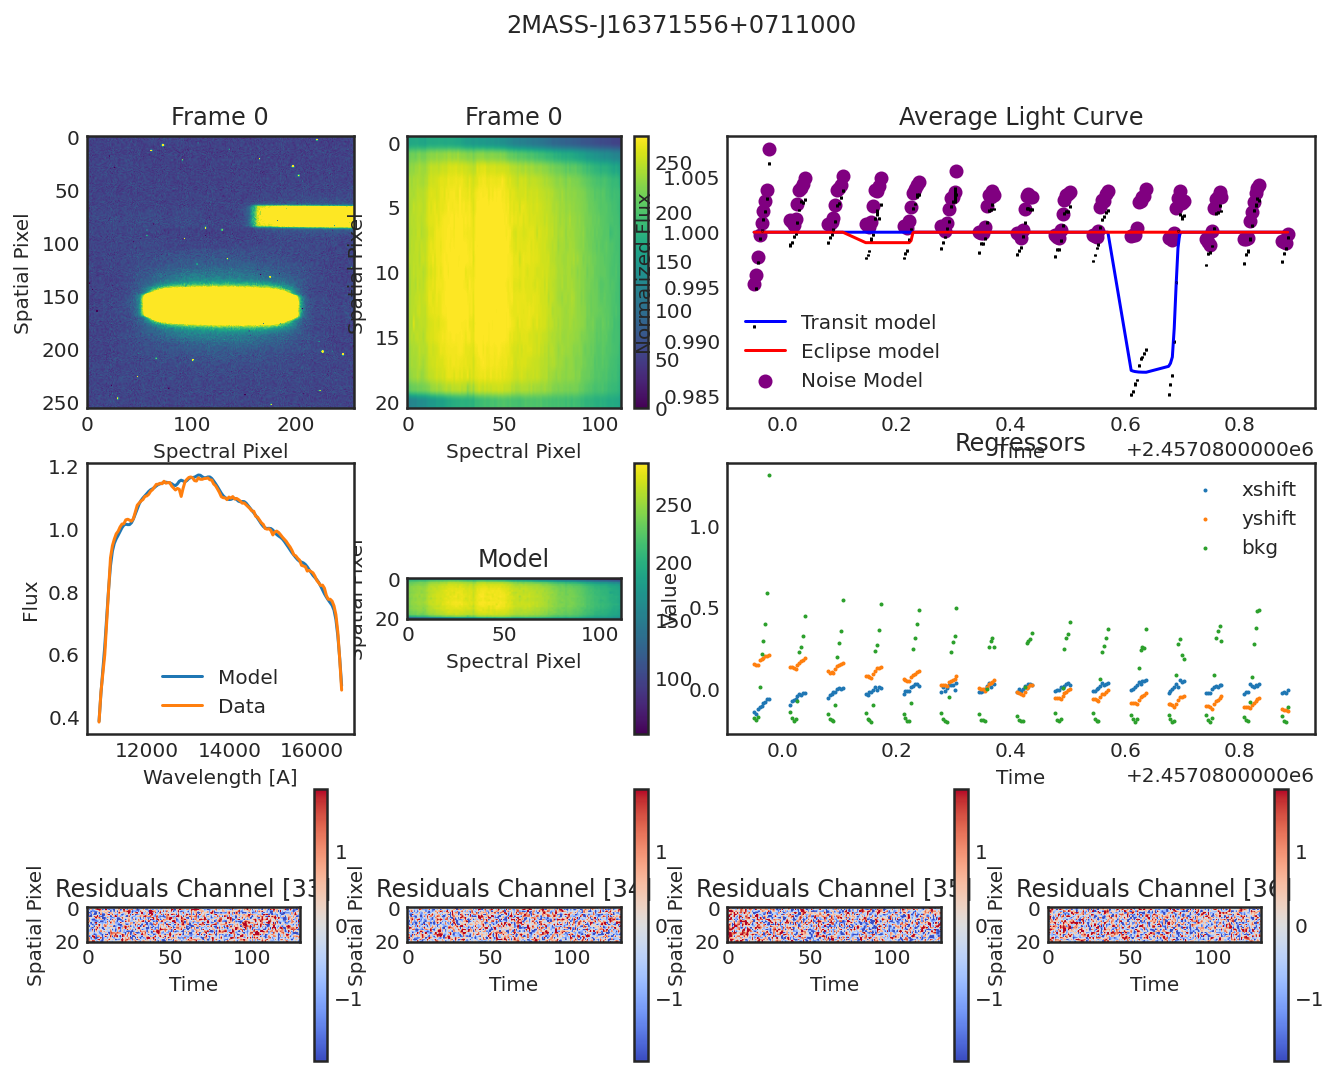

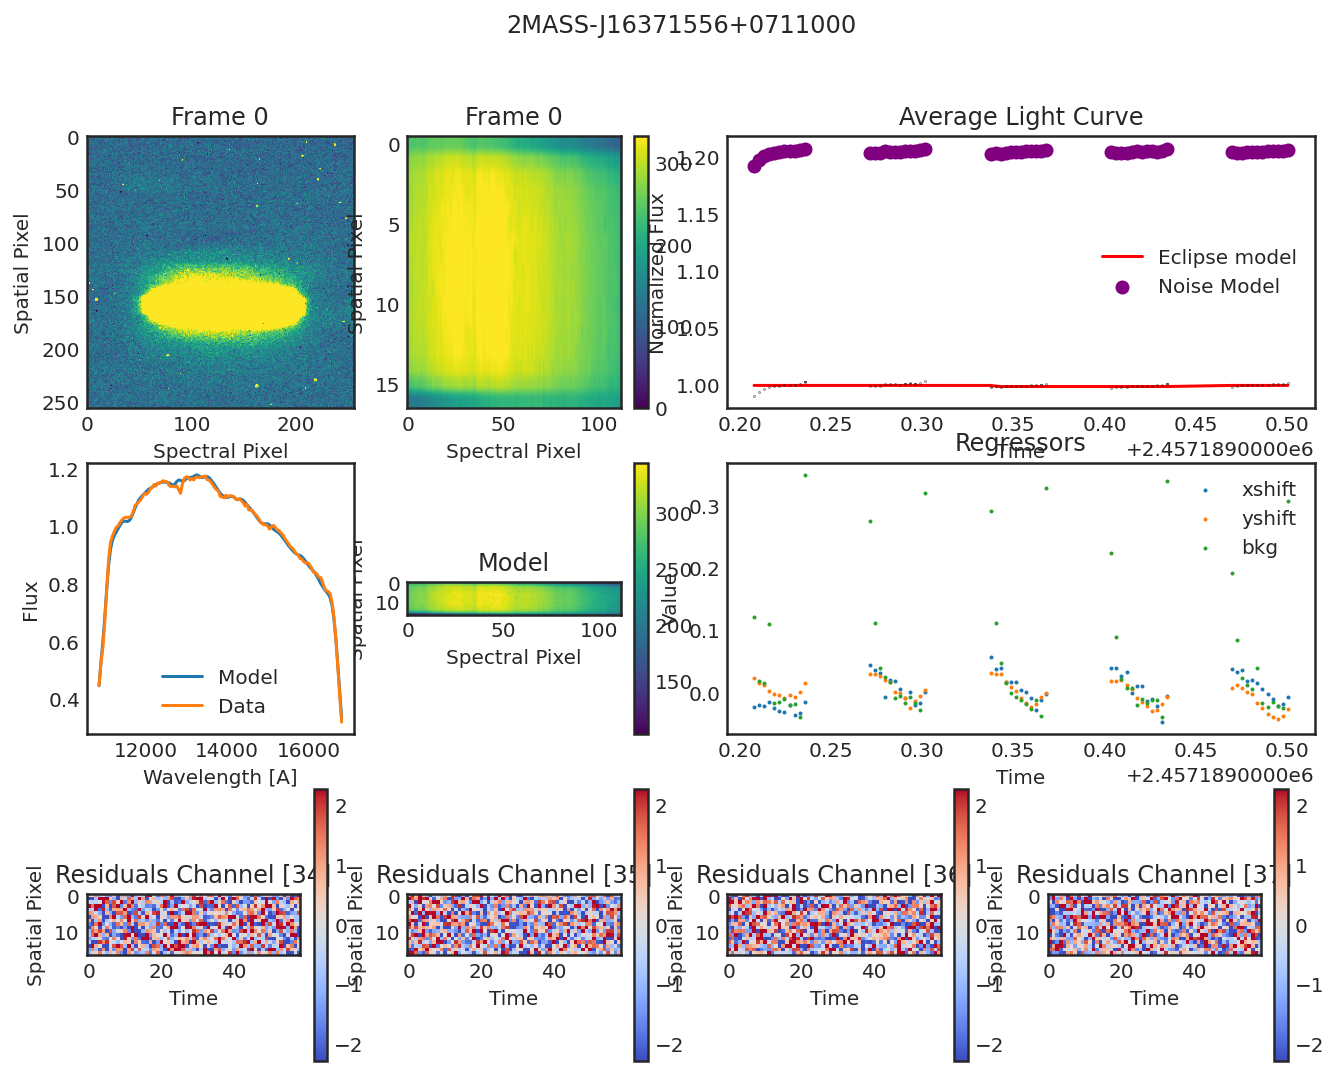

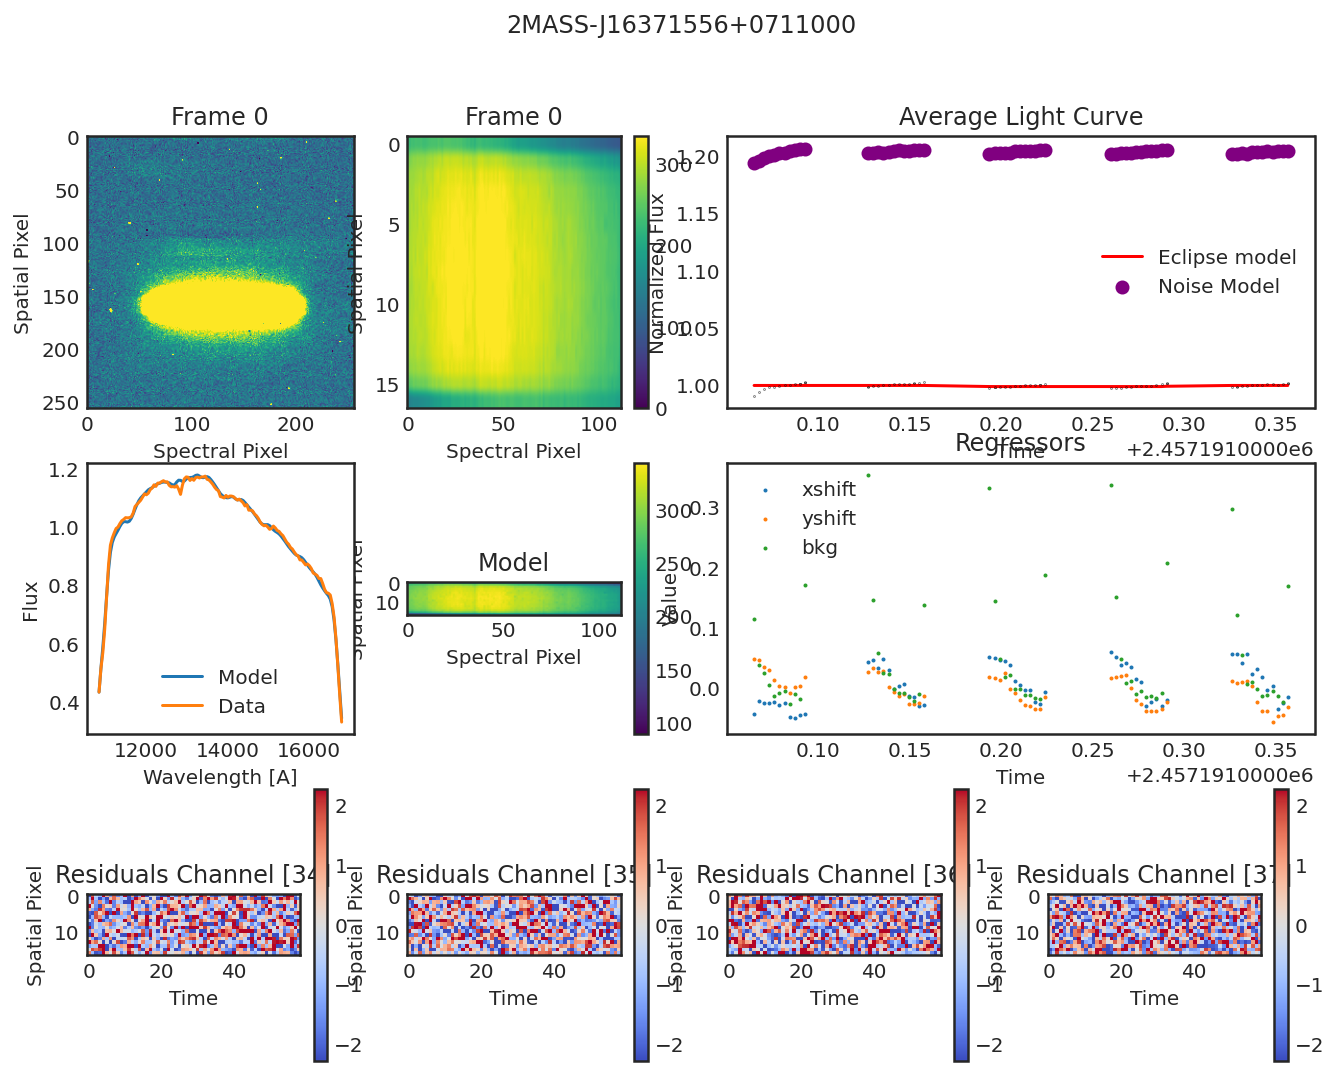

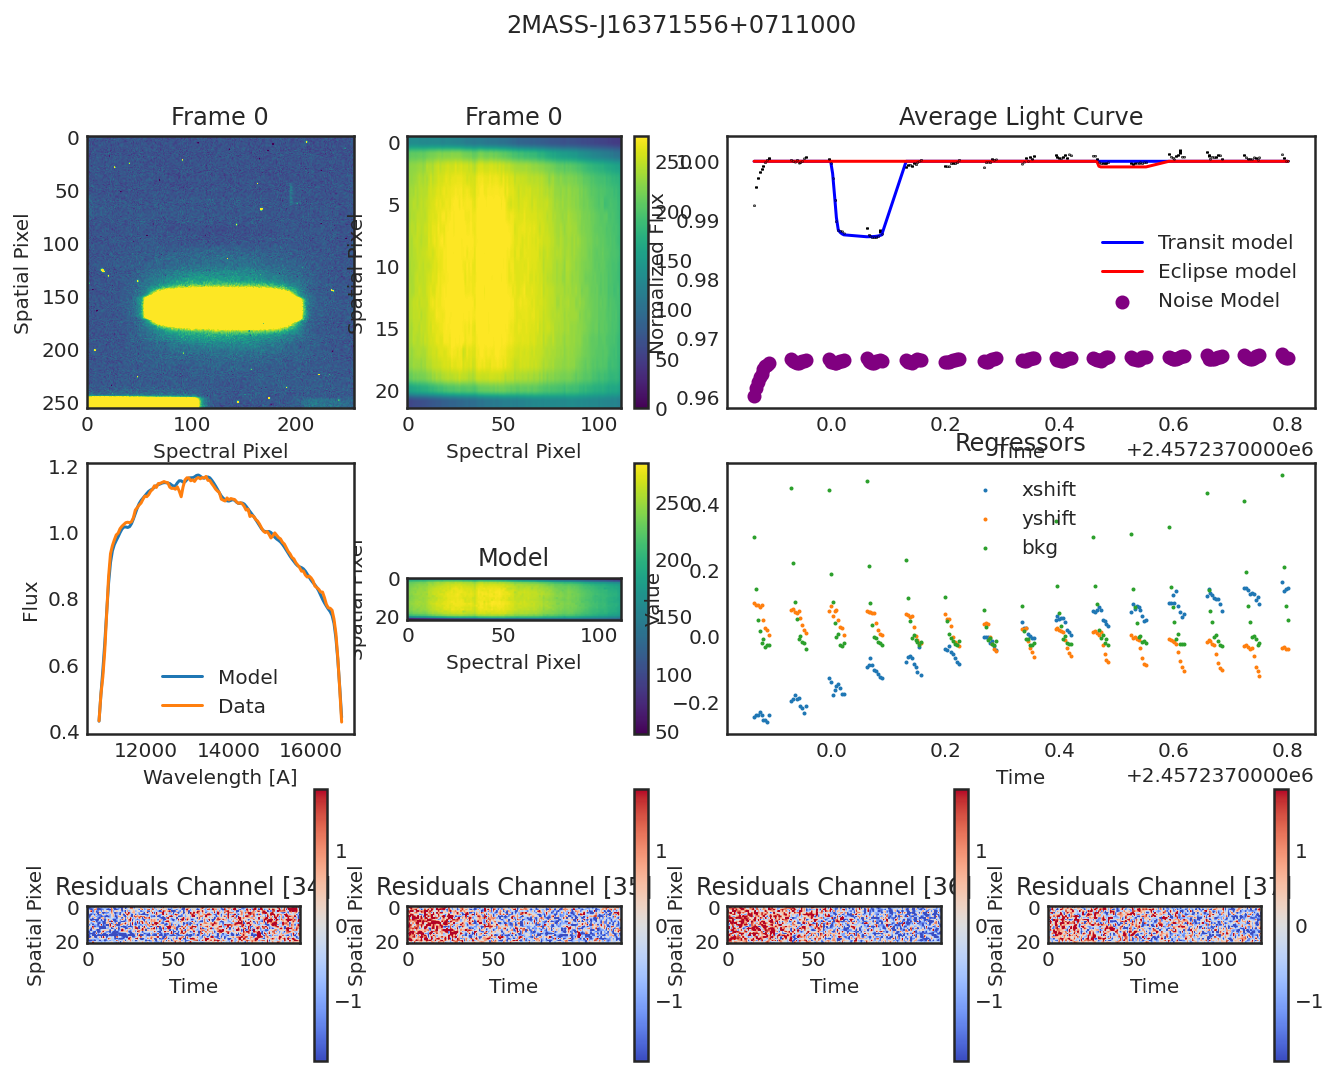

In [13]:
for visit in obs:
    visit.diagnose();
    plt.show();